In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
from data_util import RandomAugmentSequence, center_to_corner_box
from data_util import get_anchors, extraction_boxes, show_image_labels

In [2]:
# 全データの読み込み
file_path = '/Users/chai/data/etlcdb/numpy/etl9b-box-label.npz'
loaded_array = np.load(file_path)
images = loaded_array['arr_0']
boxes = loaded_array['arr_1']
labels = loaded_array['arr_2']

In [3]:
# パラメータ
n_concat = 3
batch_size = 10
idx = 100
input_shape = np.array([64*1.5, 64*2.5], dtype=np.int64)
anchors_path = 'model_data/yolo_anchors.txt'
anchors = get_anchors(anchors_path)
num_classes = 3035

In [4]:
#データの変換
corner_boxes = np.array([center_to_corner_box(box) for box in boxes])
decode_labels = np.argmax(labels, axis=1)

In [146]:
data_sequence = RandomAugmentSequence(
    images, corner_boxes, decode_labels, batch_size, input_shape, anchors,
    num_classes, n_concat, r_translate=0.1, r_scale=0.3, r_aspect_rate=0.2)

In [147]:
idx = 1
data = data_sequence.__getitem__(idx)

In [148]:
b = 1
image = data[0][0][b]
box, score, label = extraction_boxes(data[0][2][b])

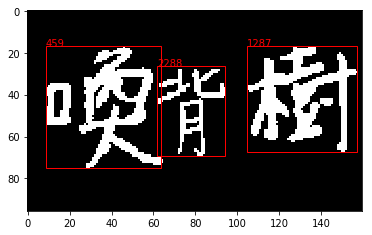

In [151]:
show_image_labels(np.squeeze(image), box, score, label)

In [150]:
image.shape

(96, 160, 1)